In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, ShuffleSplit, learning_curve
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, f1_score, r2_score
import time
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn import svm
from sklearn.svm import SVC
import math
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

dataset=pd.read_csv("SampleDatasets/spiral1.csv")

dataset[pd.isnull(dataset).any(axis=1)]
dataset = dataset.interpolate()  # Interpolate our data to get rid of null values

X = dataset.drop('label',axis=1) #Separate predictors and response Predictors
y = dataset['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # Get a training and test dataset

In [2]:
#CREATING_LEARNING_CURVE_FUNCTION
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    plt.gca().invert_yaxis()
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [3]:
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[0][0]
    TN = conf_matrix[1][1]
    FP = conf_matrix[1][0]
    FN = conf_matrix[0][1]
    print('True Positives:', TP, '\t' , 'False Positives:', FP)
    print('True Negatives:', TN, '\t', 'False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TP / float(TP + FP))
    
     # calculate neagtive predective value
    conf_negative = (TN / float(TN + FN))
    
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    
    # calculate Geometric mean score
    conf_gm = math.sqrt(conf_precision * conf_specificity)
    
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2) * 100}') 
    print(f'Sensitivity(Recall): {round(conf_sensitivity,2)* 100}') 
    print(f'Specificity(True Negative Rate): {round(conf_specificity,2)* 100}') 
    print(f'Precision(Positive Predictive Value): {round(conf_precision,2)* 100}')
    print(f'Negative Predictive Value: {round(conf_negative,2)* 100}')
    print(f'f_1 Score(average of Precision and Sensitivity): {round(conf_f1,2)* 100}')
    print(f'Geometric mean: {round(conf_gm,2) * 100}')
    print()

In [4]:
def print_score(classifier,X_train,y_train,X_test,y_test):    
    print("Training results:")
    print('Accuracy Score: {0:.4f}'.format(accuracy_score(y_train,classifier.predict(X_train)) * 100))   
    res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
    print('Validation Accuracy:\t{0:.4f}'.format(res.mean()* 100))
    print('Standard Deviation:\t{0:.4f}'.format(res.std() * 100))
    print()
    
    print("Test results:")
#     print('Predicted Accuracy Score: {0:.4f}'.format(accuracy_score(y_test,classifier.predict(X_test))* 100))
    y_pred = classifier.predict(X_test)
    print("R2 Score:", format(r2_score(y_test, y_pred) * 100))
    print('Misclassified samples: %d' % (y_test != y_pred).sum())
    classification_report(y_test,classifier.predict(X_test))
    cm = confusion_matrix(y_test,classifier.predict(X_test))
    print()
    cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
    confusion_metrics(cm)

LDA on Spiral Dataset 

Training results:
Accuracy Score: 76.4286
Validation Accuracy:	76.2920
Standard Deviation:	4.1566

Test results:
R2 Score: -13.413983276996987
Misclassified samples: 85

True Positives: 102 	 False Positives: 41
True Negatives: 113 	 False Negatives: 44
--------------------------------------------------
Accuracy: 72.0
Sensitivity(Recall): 70.0
Specificity(True Negative Rate): 73.0
Precision(Positive Predictive Value): 71.0
Negative Predictive Value: 72.0
f_1 Score(average of Precision and Sensitivity): 71.0
Geometric mean: 72.0



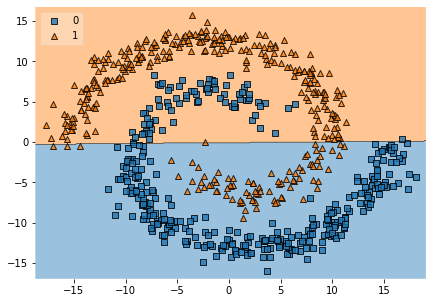

execution time is 3.251443862915039


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

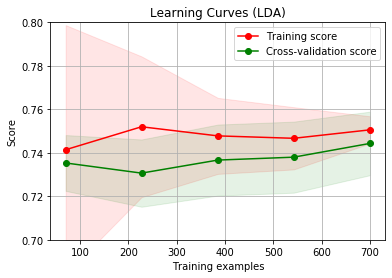

In [5]:
start = time.time()

LDA = LinearDiscriminantAnalysis(n_components=1) 

# The n_components key word gives us the projection to the n most discriminative directions in the dataset. 
# We set this parameter to two to get a transformation in two dimensional space.  

LDA.fit_transform(X_train,y_train)

print("LDA on Spiral Dataset",'\n')

print_score(LDA,X_train,y_train,X_test,y_test)

fig = plt.figure(figsize=(7,5))
plot_decision_regions(X_train.values, y_train.astype(np.integer).values, clf=LDA, legend=2)
plt.show()

end = time.time()
print("execution time is",end - start)

title = "Learning Curves (LDA)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
# cross_val_score(svm,X_tf_idf , y, cv=cv)  
plot_learning_curve(LDA, title, X, y, ylim=(0.7, 0.8), cv=cv, n_jobs=10)

Quadratic Analysis on Spiral Dataset 

Training results:
Accuracy Score: 76.5714
Validation Accuracy:	76.2920
Standard Deviation:	4.1566

Test results:
R2 Score: -13.413983276996987
Misclassified samples: 85

True Positives: 102 	 False Positives: 41
True Negatives: 113 	 False Negatives: 44
--------------------------------------------------
Accuracy: 72.0
Sensitivity(Recall): 70.0
Specificity(True Negative Rate): 73.0
Precision(Positive Predictive Value): 71.0
Negative Predictive Value: 72.0
f_1 Score(average of Precision and Sensitivity): 71.0
Geometric mean: 72.0



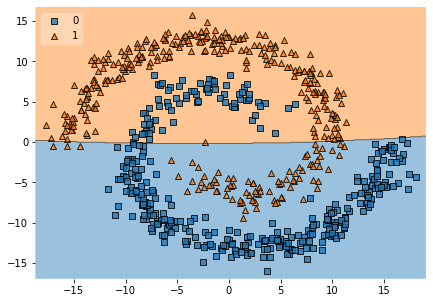

execution time is 2.0465478897094727


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

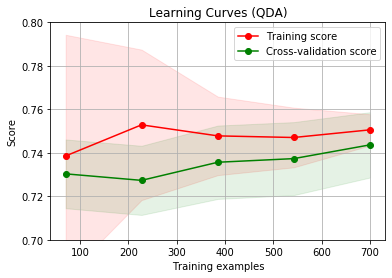

In [6]:
start = time.time()

QDA = QuadraticDiscriminantAnalysis() 

QDA.fit(X_train,y_train)

print("Quadratic Analysis on Spiral Dataset",'\n')
print_score(QDA,X_train,y_train,X_test,y_test)

fig = plt.figure(figsize=(7,5))
plot_decision_regions(X_train.values, y_train.astype(np.integer).values, clf=QDA, legend=2)
plt.show()

end = time.time()
print("execution time is",end - start)

title = "Learning Curves (QDA)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
# cross_val_score(svm,X_tf_idf , y, cv=cv)  
plot_learning_curve(QDA, title, X, y, ylim=(0.7, 0.8), cv=cv, n_jobs=10)

SVM on Spiral Dataset 

Training results:
Accuracy Score: 100.0000
Validation Accuracy:	99.2815
Standard Deviation:	0.7186

Test results:
R2 Score: 98.66571784380004
Misclassified samples: 1

True Positives: 146 	 False Positives: 1
True Negatives: 153 	 False Negatives: 0
--------------------------------------------------
Accuracy: 100.0
Sensitivity(Recall): 100.0
Specificity(True Negative Rate): 99.0
Precision(Positive Predictive Value): 99.0
Negative Predictive Value: 100.0
f_1 Score(average of Precision and Sensitivity): 100.0
Geometric mean: 99.0



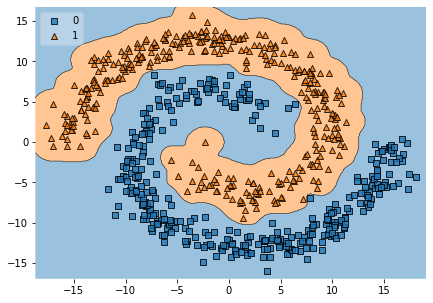

execution time is 3.579841136932373


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

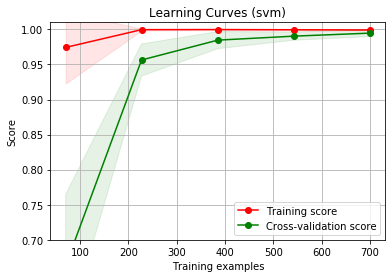

In [7]:
start = time.time()
svm = SVC(kernel='rbf', random_state=0, gamma=1, C=0.5)

svm.fit(X_train, y_train)
print("SVM on Spiral Dataset",'\n')
print_score(svm,X_train,y_train,X_test,y_test)

fig = plt.figure(figsize=(7,5))
plot_decision_regions(X_train.values, y_train.astype(np.integer).values, clf=svm, legend=2)
plt.show()

end = time.time()
print("execution time is",end - start)

title = "Learning Curves (svm)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
# cross_val_score(svm,X_tf_idf , y, cv=cv)  
plot_learning_curve(svm, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=10)

Gaussian on Spiral Dataset 

Training results:
Accuracy Score: 74.8571
Validation Accuracy:	74.8530
Standard Deviation:	4.1177

Test results:
R2 Score: -21.41967621419678
Misclassified samples: 91

True Positives: 97 	 False Positives: 42
True Negatives: 112 	 False Negatives: 49
--------------------------------------------------
Accuracy: 70.0
Sensitivity(Recall): 66.0
Specificity(True Negative Rate): 73.0
Precision(Positive Predictive Value): 70.0
Negative Predictive Value: 70.0
f_1 Score(average of Precision and Sensitivity): 68.0
Geometric mean: 71.0



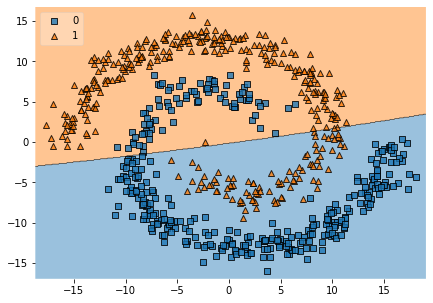

execution time is 1.5773921012878418


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

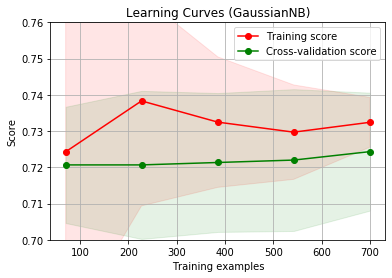

In [8]:
start = time.time()
gnb = GaussianNB() 

gnb.fit(X_train, y_train)

print("Gaussian on Spiral Dataset",'\n')
print_score(gnb,X_train,y_train,X_test,y_test)

fig = plt.figure(figsize=(7,5))
plot_decision_regions(X_train.values, y_train.astype(np.integer).values, clf=gnb, legend=2)
plt.show()

end = time.time()
print("execution time is",end - start)

title = "Learning Curves (GaussianNB)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
# cross_val_score(svm,X_tf_idf , y, cv=cv)  
plot_learning_curve(gnb, title, X, y, ylim=(0.7, 0.76), cv=cv, n_jobs=10)

Bernoulli Gaussian on spiral Dataset 

Training results:
Accuracy Score: 76.5714
Validation Accuracy:	76.5778
Standard Deviation:	4.2527

Test results:
R2 Score: -13.413983276996987
Misclassified samples: 85

True Positives: 102 	 False Positives: 41
True Negatives: 113 	 False Negatives: 44
--------------------------------------------------
Accuracy: 72.0
Sensitivity(Recall): 70.0
Specificity(True Negative Rate): 73.0
Precision(Positive Predictive Value): 71.0
Negative Predictive Value: 72.0
f_1 Score(average of Precision and Sensitivity): 71.0
Geometric mean: 72.0



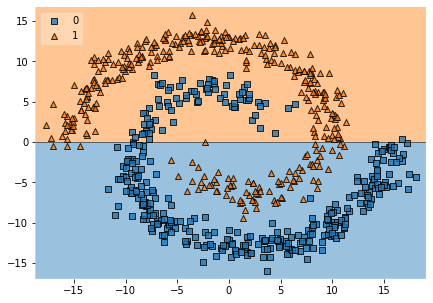

execution time is 1.3987488746643066


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

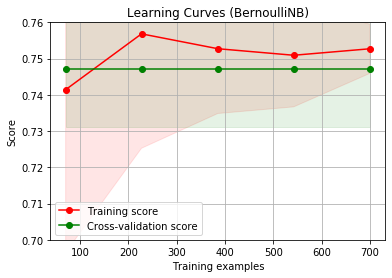

In [9]:
start = time.time()
bnb = BernoulliNB() 

bnb.fit(X_train, y_train)
print("Bernoulli Gaussian on spiral Dataset",'\n')
print_score(bnb,X_train,y_train,X_test,y_test)

fig = plt.figure(figsize=(7,5))
plot_decision_regions(X_train.values, y_train.astype(np.integer).values, clf=bnb, legend=2)
plt.show()

end = time.time()
print("execution time is",end - start) 

title = "Learning Curves (BernoulliNB)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
# cross_val_score(svm,X_tf_idf , y, cv=cv)  
plot_learning_curve(bnb, title, X, y, ylim=(0.7, .76), cv=cv, n_jobs=10)